## Time Series EDA

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime


In [4]:
df_tesla = pdr.get_data_yahoo('TSLA')

<AxesSubplot:xlabel='Date'>

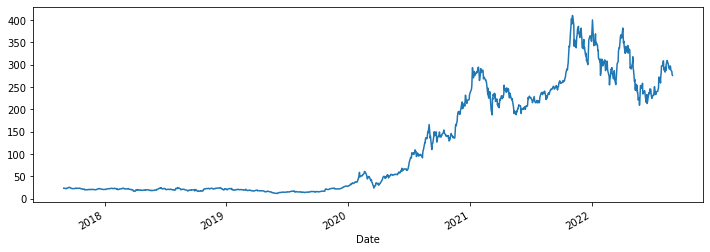

In [10]:
df_tesla['Close'].plot(figsize = (12,4))

<AxesSubplot:xlabel='Date'>

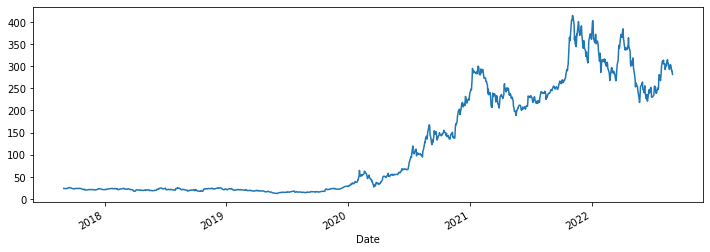

In [11]:
df_tesla['High'].plot(figsize = (12,4))

<AxesSubplot:xlabel='Date'>

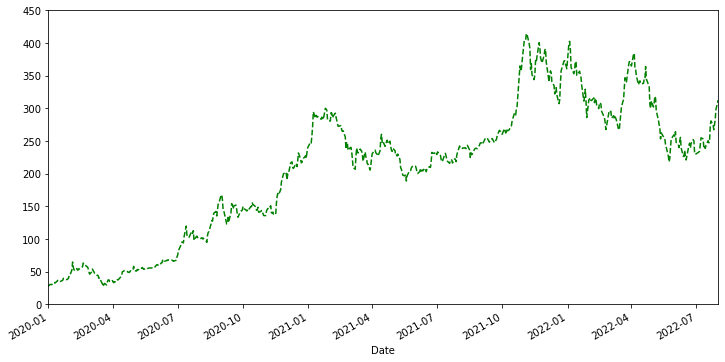

In [20]:
df_tesla['High'].plot(xlim = ['2020-01-01','2022-08-01'], ylim = [0,450], figsize = (12,6), ls = '--', c = 'green')

In [21]:
index = df_tesla.loc['2020-01-01':'2022-08-01'].index

In [22]:
tesla_open = df_tesla.loc[index]['Open']

In [24]:
tesla_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2022-07-26    266.513336
2022-07-27    263.809998
2022-07-28    280.066681
2022-07-29    280.700012
2022-08-01    301.276672
Name: Open, Length: 650, dtype: float64

In [25]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22',
               '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
               '2022-07-29', '2022-08-01'],
              dtype='datetime64[ns]', name='Date', length=650, freq=None)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

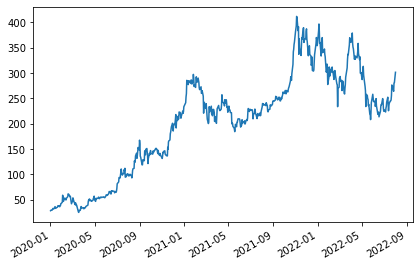

In [29]:
figure, axis = plt.subplots()
plt.tight_layout()
#prevent overlapping
figure.autofmt_xdate()
axis.plot(index, tesla_open)

In [30]:
## Datetime index

In [31]:
df_tesla = df_tesla.reset_index()

In [32]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [37]:
df_tesla = df_tesla.set_index('Date', drop = True)

KeyError: "None of ['Date'] are in the columns"

In [38]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-31,23.896000,23.521334,23.570000,23.726667,61092000.0,23.726667
2017-09-01,23.839333,23.579332,23.741333,23.693333,45742500.0,23.693333
2017-09-05,23.699333,23.059334,23.586666,23.306000,57526500.0,23.306000
2017-09-06,23.398666,22.770666,23.299999,22.968666,61371000.0,22.968666
2017-09-07,23.498667,22.896667,23.065332,23.374001,63588000.0,23.374001
...,...,...,...,...,...,...
2022-08-25,302.959991,291.600006,302.359985,296.070007,53230000.0,296.070007
2022-08-26,302.000000,287.470001,297.429993,288.089996,56905800.0,288.089996
2022-08-29,287.739990,280.700012,282.829987,284.820007,41864700.0,284.820007


In [39]:
from datetime import datetime

## Time Resampling

<AxesSubplot:xlabel='Date'>

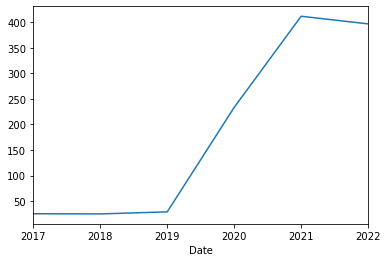

In [55]:
df_tesla.resample(rule = 'A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

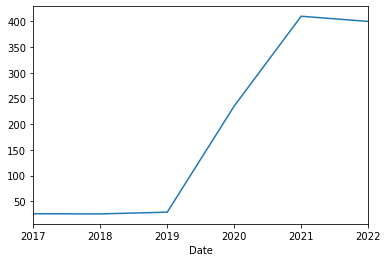

In [56]:
df_tesla.resample(rule = 'A').max()['Close'].plot()

In [57]:
df_tesla.resample(rule = 'A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,25.974001,25.178667,25.350000,25.666668,296871000.0,25.666668
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-31,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


<AxesSubplot:xlabel='Date'>

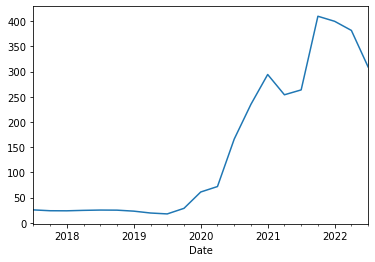

In [64]:
df_tesla.resample(rule = 'BQS').max()['Close'].plot()

In [65]:
df_tesla.resample(rule = 'BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-03,25.974001,25.178667,25.350000,25.666668,122391000.0,25.666668
2017-10-02,24.200001,23.608667,23.798668,23.976667,296871000.0,23.976667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-02,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-02,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667


<AxesSubplot:xlabel='Date'>

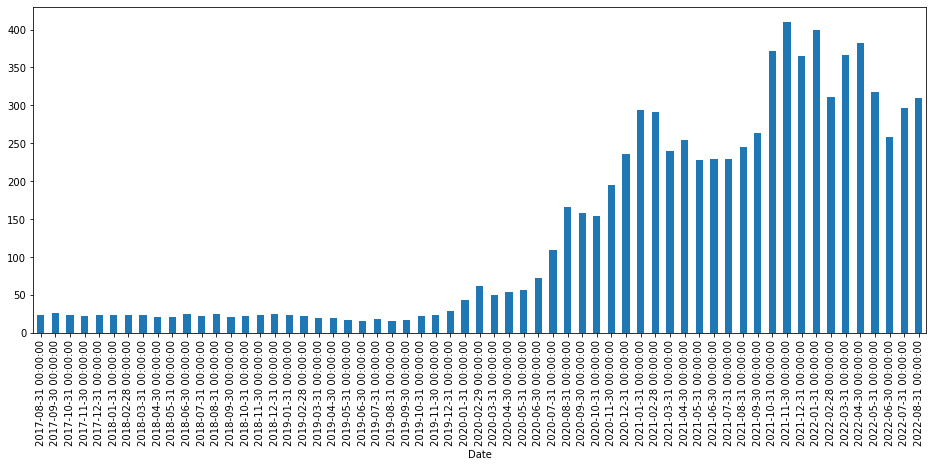

In [68]:
df_tesla.resample(rule = 'M').max()['Close'].plot(kind = 'bar', figsize = (16,6))

<AxesSubplot:xlabel='Date'>

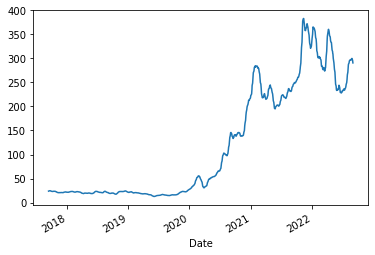

In [69]:
df_tesla['Close'].rolling(10).mean().plot()

In [71]:
df_tesla['Close'].rolling(10).mean().head(20)

Date
2017-08-31          NaN
2017-09-01          NaN
2017-09-05          NaN
2017-09-06          NaN
2017-09-07          NaN
2017-09-08          NaN
2017-09-11          NaN
2017-09-12          NaN
2017-09-13          NaN
2017-09-14    23.798267
2017-09-15    23.957667
2017-09-18    24.155000
2017-09-19    24.325067
2017-09-20    24.520934
2017-09-21    24.626733
2017-09-22    24.678000
2017-09-25    24.553333
2017-09-26    24.436667
2017-09-27    24.268267
2017-09-28    24.014667
Name: Close, dtype: float64

In [72]:
df_tesla['Close:rolling 30 days'] = df_tesla['Close'].rolling(30).mean()

###  Used rolling() for getting Simple moving average

In [73]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close,Close:rolling 30 days
Date,,,,,,,
2017-08-31,23.896000,23.521334,23.570000,23.726667,61092000.0,23.726667,NaN
2017-09-01,23.839333,23.579332,23.741333,23.693333,45742500.0,23.693333,NaN
2017-09-05,23.699333,23.059334,23.586666,23.306000,57526500.0,23.306000,NaN
2017-09-06,23.398666,22.770666,23.299999,22.968666,61371000.0,22.968666,NaN
2017-09-07,23.498667,22.896667,23.065332,23.374001,63588000.0,23.374001,NaN
...,...,...,...,...,...,...,...
2022-08-25,302.959991,291.600006,302.359985,296.070007,53230000.0,296.070007,285.118112
2022-08-26,302.000000,287.470001,297.429993,288.089996,56905800.0,288.089996,286.718889
2022-08-29,287.739990,280.700012,282.829987,284.820007,41864700.0,284.820007,288.194668


<AxesSubplot:xlabel='Date'>

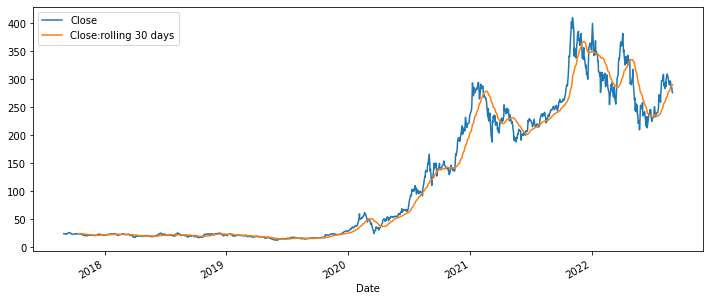

In [75]:
df_tesla[['Close','Close:rolling 30 days']].plot(figsize = (12,5))

In [77]:
df_microsoft = pdr.get_data_yahoo('MSFT')

In [80]:
df_microsoft.max()

High         3.496700e+02
Low          3.422000e+02
Open         3.446200e+02
Close        3.431100e+02
Volume       1.112421e+08
Adj Close    3.408828e+02
dtype: float64

In [87]:
df_microsoft[df_microsoft['High'] == df_microsoft['High'].max()].index

DatetimeIndex(['2021-11-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [89]:
df_microsoft[df_microsoft['Low'] == df_microsoft['Low'].min()].index

DatetimeIndex(['2017-09-25'], dtype='datetime64[ns]', name='Date', freq=None)

In [97]:
# multiple Simple moving Avg eg
df_tesla['close:10 day rolling'] = df_tesla['Close'].rolling(window=10,min_periods=1).mean()
df_tesla['close:20 day rolling'] = df_tesla['Close'].rolling(window=20,min_periods=1).mean()
df_tesla['close:50 day rolling'] = df_tesla['Close'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

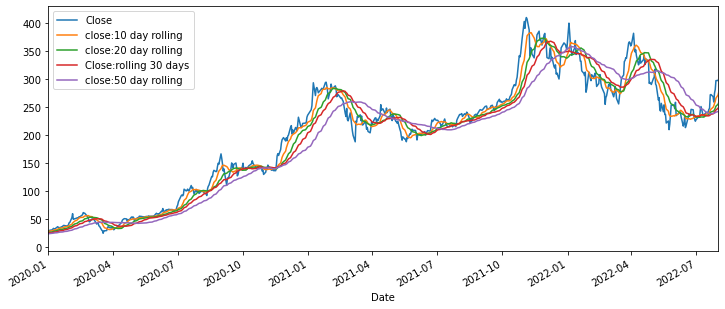

In [98]:
df_tesla[['Close','close:10 day rolling','close:20 day rolling','Close:rolling 30 days','close:50 day rolling']].plot(xlim=['2020-01-01','2022-08-01'],figsize = (12,5))

In [99]:
# Cumulative Moving Average CMA using Expand function

<AxesSubplot:xlabel='Date'>

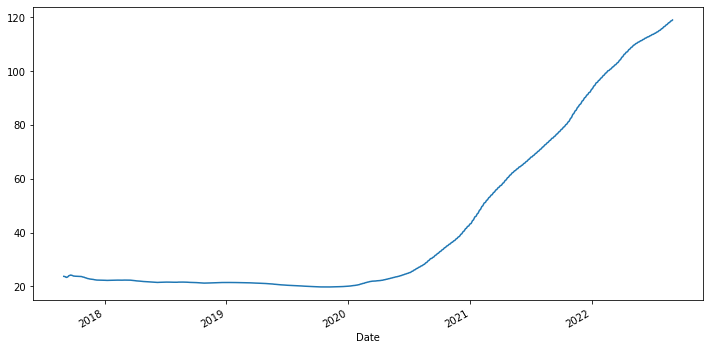

In [100]:
df_tesla['Close'].expanding().mean().plot(figsize=(12,6))

## EMA calculations
steps:
1. calculate simple MA for first reading.
2. later we can use formula: ((close-Previous EMA)*multiplier + (Previous EMA))
3. formula for multiplier: 2/(ema_window + 1)

In [102]:
df_tesla['close_0.1ema'] = df_tesla['Close'].ewm(alpha = 0.1,adjust = False).mean()
df_tesla['close_0.3ema'] = df_tesla['Close'].ewm(alpha = 0.3,adjust = False).mean()
df_tesla['close_0.5ema'] = df_tesla['Close'].ewm(alpha = 0.5,adjust = False).mean()

<AxesSubplot:xlabel='Date'>

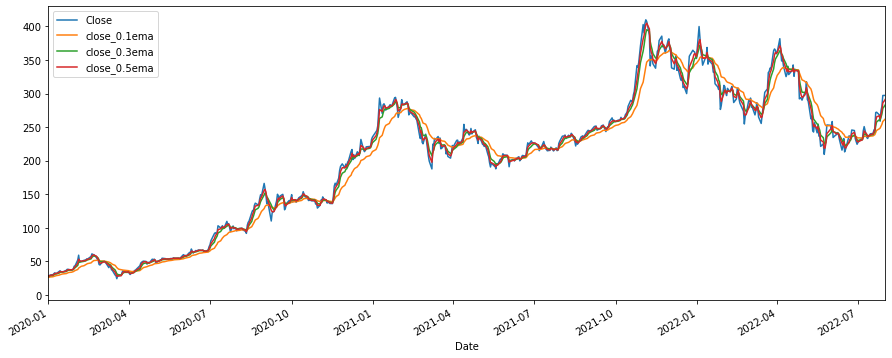

In [104]:
df_tesla[['Close','close_0.1ema','close_0.3ema','close_0.5ema']].plot(xlim=['2020-01-01','2022-08-01'],figsize = (15,6))

## EWMA calculations

formula: a * x(t) + (1-a) * EWMA(t-1)

to use in programming use ewm(span = no. of days)

In [105]:
df_tesla['close_5ewma'] = df_tesla['Close'].ewm(span = 5).mean()
df_tesla['close_20ewma'] = df_tesla['Close'].ewm(span = 20).mean()
df_tesla['close_50ewma'] = df_tesla['Close'].ewm(span = 50).mean()

<AxesSubplot:xlabel='Date'>

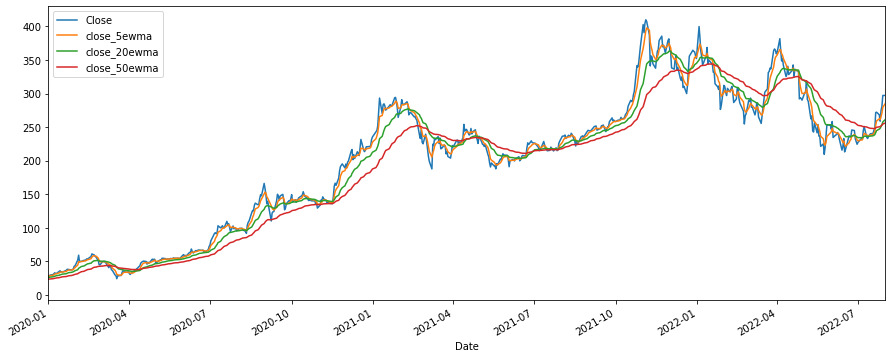

In [109]:
df_tesla[['Close','close_5ewma','close_20ewma', 'close_50ewma']].plot(xlim=['2020-01-01','2022-08-01'],figsize = (15,6))